# Preprocessing the data & Analysis
**Dataset:**  Apartment rental offers in Germany  

**Source of the dataset:**  [Kaggle](https://www.kaggle.com/datasets/corrieaar/apartment-rental-offers-in-germany?resource=download)  

**Developer:** Arian Immen

# Libraries that used in the preprocessing

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading the data to a df (Dataframe)

In [26]:
df = pd.read_csv('immo_data.csv')
df.head(3) # checking the first 3 row of our dataset

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.0,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.0,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.0,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19


Now, let’s examine the dimensions and columns to understand our dataset.

In [27]:
df.shape # it has 268850 rows and 49 columns

(268850, 49)

In [28]:
df.dtypes

regio1                       object
serviceCharge               float64
heatingType                  object
telekomTvOffer               object
telekomHybridUploadSpeed    float64
newlyConst                     bool
balcony                        bool
picturecount                  int64
pricetrend                  float64
telekomUploadSpeed          float64
totalRent                   float64
yearConstructed             float64
scoutId                       int64
noParkSpaces                float64
firingTypes                  object
hasKitchen                     bool
geo_bln                      object
cellar                         bool
yearConstructedRange        float64
baseRent                    float64
houseNumber                  object
livingSpace                 float64
geo_krs                      object
condition                    object
interiorQual                 object
petsAllowed                  object
street                       object
streetPlain                 

# Keeping only the importance columns

Initially, we identify columns with null values ranging from 50% to 70%. If a column is deemed important, we won't drop it; otherwise, it will be dropped. Subsequently, columns exceeding 70% null values are going to be removed

In [29]:
null_percent = df.isna().sum() / len(df) * 100
null_percent

regio1                       0.000000
serviceCharge                2.569834
heatingType                 16.684397
telekomTvOffer              12.132788
telekomHybridUploadSpeed    83.254603
newlyConst                   0.000000
balcony                      0.000000
picturecount                 0.000000
pricetrend                   0.681421
telekomUploadSpeed          12.407662
totalRent                   15.070485
yearConstructed             21.218151
scoutId                      0.000000
noParkSpaces                65.388879
firingTypes                 21.188023
hasKitchen                   0.000000
geo_bln                      0.000000
cellar                       0.000000
yearConstructedRange        21.218151
baseRent                     0.000000
houseNumber                 26.415473
livingSpace                  0.000000
geo_krs                      0.000000
condition                   25.474800
interiorQual                41.906267
petsAllowed                 42.615957
street      

In [30]:
cond = (df.isna().sum()/len(df) >=0.5) & (df.isna().sum()/len(df) < 0.7 )
df.columns[cond]

Index(['noParkSpaces', 'heatingCosts', 'lastRefurbish'], dtype='object')

In [31]:
cond = (df.isna().sum()/len(df) >= 0.7 )
df.columns[cond]

Index(['telekomHybridUploadSpeed', 'energyEfficiencyClass',
       'electricityBasePrice', 'electricityKwhPrice'],
      dtype='object')

In [32]:
cond = (df.isna().sum()/len(df) >=0.5)
df.drop(df.columns[cond], axis=1, inplace=True)
df.shape

(268850, 42)

Now we should see which columns are useful for us and important and just keep them

In [33]:
df = df[['regio1', 'heatingType', 'newlyConst',
            'balcony','totalRent','hasKitchen',
            'cellar','livingSpace','condition',
            'lift','noRoomsRange','garden','floor']]

# Droping the outliers

We need to identify columns containing numerical (integer or float) data types and detect any outliers, subsequently removing them from the dataset.

In [34]:
cond = (df.dtypes != object) & (df.dtypes != bool)
columns = list(df.columns[cond])
columns

['totalRent', 'livingSpace', 'noRoomsRange', 'floor']

In [35]:
print(f'Numbers of data before droping the outliers : {df.shape}')
for column in columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    left_boundry = Q1 - 1.5 * IQR
    Right_boundry = Q3 + 1.5 * IQR
    cond = (df[column] > left_boundry) & (df[column] < Right_boundry)
    df = df[cond]
print(f'Numbers of data after droping the outliers : {df.shape}')

Numbers of data before droping the outliers : (268850, 13)
Numbers of data after droping the outliers : (167021, 13)


We don't have instances of zero-priced or less than 30 Euro houses , so let's remove them as well.

In [36]:
cond = df['totalRent'] > 30
df = df[cond]
print(f'Numbers of data after droping the outliers : {df.shape}')

Numbers of data after droping the outliers : (166792, 13)


In [37]:
df.reset_index(inplace=True,drop=True) # Let's reset the index so it is a little bit more nice

# Handeling Missing Values

Let's identify the columns with missing data.

In [38]:
df.isna().sum()

regio1              0
heatingType     23485
newlyConst          0
balcony             0
totalRent           0
hasKitchen          0
cellar              0
livingSpace         0
condition       37832
lift                0
noRoomsRange        0
garden              0
floor               0
dtype: int64

1- Condition:  

Given that the "condition" column's data type is string, we'll identify the most frequent value and replace the missing data with it.

In [39]:
df['condition'].value_counts() # well_kept is our candidate!

condition
well_kept                             43722
refurbished                           19955
fully_renovated                       17289
mint_condition                        12553
modernized                            11931
first_time_use                        11018
first_time_use_after_refurbishment    10136
negotiable                             1437
need_of_renovation                      916
ripe_for_demolition                       3
Name: count, dtype: int64

In [40]:
df['condition'].fillna('well_kept',inplace= True)

2- heatingType:

Given that the "heatingType" column's data type is string, we'll identify the most frequent value and replace the missing data with it.

In [41]:
df['heatingType'].value_counts()

heatingType
central_heating                   82980
district_heating                  16792
gas_heating                       13847
self_contained_central_heating    11683
floor_heating                      9467
oil_heating                        3215
heat_pump                          1503
combined_heat_and_power_plant      1369
night_storage_heater                973
wood_pellet_heating                 614
electric_heating                    574
stove_heating                       189
solar_heating                       101
Name: count, dtype: int64

In [42]:
df['heatingType'].fillna('central_heating',inplace=True)

We have filled in all the missing values. Let's verify to ensure completeness.

In [43]:
df.isna().sum()

regio1          0
heatingType     0
newlyConst      0
balcony         0
totalRent       0
hasKitchen      0
cellar          0
livingSpace     0
condition       0
lift            0
noRoomsRange    0
garden          0
floor           0
dtype: int64

# Encoding the categorial columns

First, let's identify the column with a string (object) data type.

In [44]:
cond = df.dtypes == object
df.columns[cond]

Index(['regio1', 'heatingType', 'condition'], dtype='object')

In [45]:
regio1_encoded = pd.get_dummies(df['regio1'])
heatingType_encoded = pd.get_dummies(df['heatingType'])
condition_encoded = pd.get_dummies(df['condition'])

In [46]:
df = pd.concat([df,regio1_encoded,heatingType_encoded,condition_encoded],axis=1)
df

,regio1,heatingType,newlyConst,balcony,totalRent,hasKitchen,cellar,livingSpace,condition,lift,...,first_time_use,first_time_use_after_refurbishment,fully_renovated,mint_condition,modernized,need_of_renovation,negotiable,refurbished,ripe_for_demolition,well_kept
0,Nordrhein_Westfalen,central_heating,False,False,840.0,False,True,86.00,well_kept,False,...,False,False,False,False,False,False,False,False,False,True
1,Sachsen,floor_heating,True,True,1300.0,False,True,83.80,first_time_use,True,...,True,False,False,False,False,False,False,False,False,False
2,Bremen,self_contained_central_heating,False,True,903.0,False,False,84.97,refurbished,False,...,False,False,False,False,False,False,False,True,False,False
3,Sachsen,self_contained_central_heating,False,False,380.0,False,True,62.00,fully_renovated,False,...,False,False,True,False,False,False,False,False,False,False
4,Baden_Württemberg,oil_heating,False,False,690.0,True,True,53.00,well_kept,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166787,Sachsen,central_heating,False,False,440.0,True,False,59.89,well_kept,False,...,False,False,False,False,False,False,False,False,False,True
166788,Sachsen,central_heating,False,True,368.0,False,True,55.00,negotiable,False,...,False,False,False,False,False,False,True,False,False,False
166789,Nordrhein_Westfalen,gas_heating,False,False,670.0,False,False,85.00,first_time_use_after_refurbishment,False,...,False,True,False,False,False,False,False,False,False,False
166790,Hessen,gas_heating,False,True,1150.0,True,False,115.00,well_kept,False,...,False,False,False,False,False,False,False,False,False,True


# Analysis

**Here’s a concise summary of the topics covered in the analysis:**

1. Analyzing average rent costs in various cities across Germany (sorted from highest to lowest).  
2. Comparing the number of balconies across different cities.  
3. Comparing the number of gardens across different cities.  
4. Comparing the living space across different cities.  
5. Investigating the different heating types used in each region.  
6. Exploring towns with the highest number of recently constructed apartments.
7. Average rent cost based on different conditions 

We're going to analyze the average rent costs in various cities across Germany, sorted from highest to lowest.

In [47]:
df_ave_region = df.groupby('regio1')['totalRent'].mean().sort_values()
pd.DataFrame(df_ave_region)

,totalRent
regio1,
Sachsen_Anhalt,492.099097
Thüringen,501.264086
Sachsen,531.416414
Mecklenburg_Vorpommern,542.900777
Brandenburg,624.143152
Saarland,679.818432
Nordrhein_Westfalen,708.993802
Niedersachsen,716.295455
Bremen,727.660541


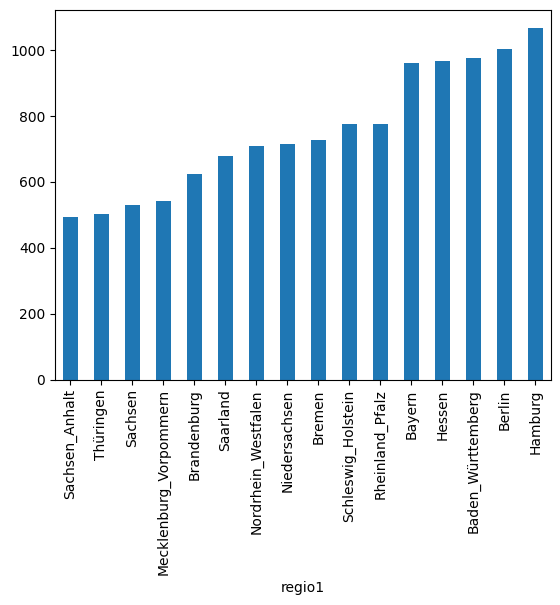

In [48]:
df_ave_region.plot(kind='bar');

Let’s examine the average rent cost based on different conditions

In [49]:
df.groupby('condition')['totalRent'].mean().reset_index().set_index('condition').sort_values('totalRent')

,totalRent
condition,
refurbished,571.748278
negotiable,572.873855
need_of_renovation,573.995000
well_kept,642.349905
fully_renovated,648.502431
modernized,667.644346
first_time_use_after_refurbishment,795.093450
ripe_for_demolition,882.833333
mint_condition,924.303551


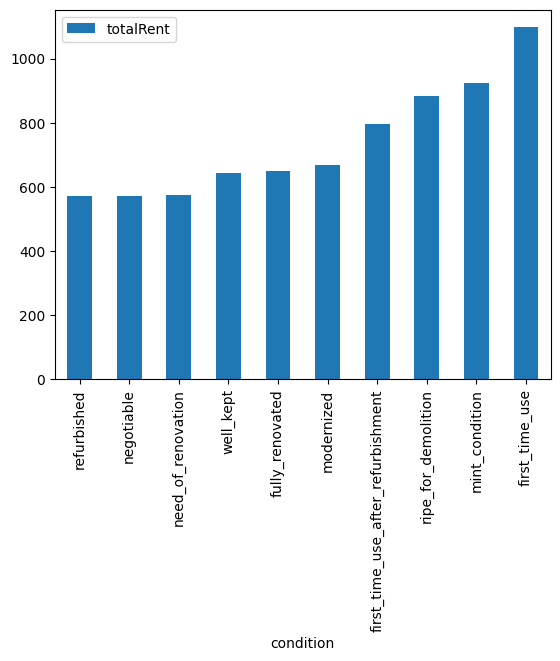

In [50]:
df.groupby('condition')['totalRent'].mean().reset_index().set_index('condition').sort_values('totalRent').plot(kind='bar');

Now let's see the average of the room numbers in differen cities

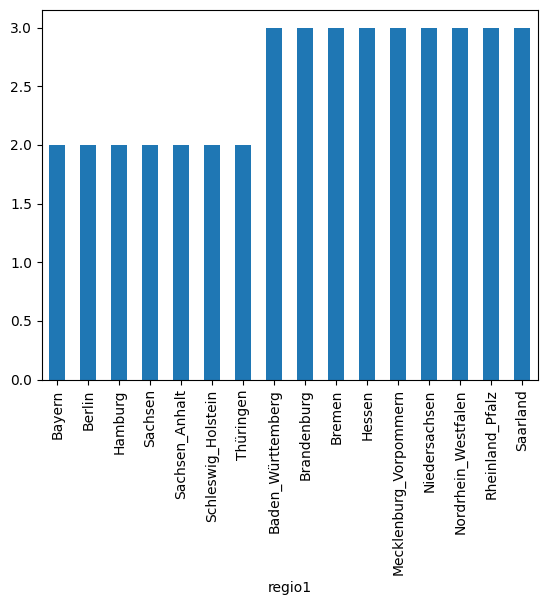

In [51]:
df.groupby('regio1')['noRoomsRange'].median().sort_values().plot(kind='bar');

 Let’s compare the number of balconies across different cities

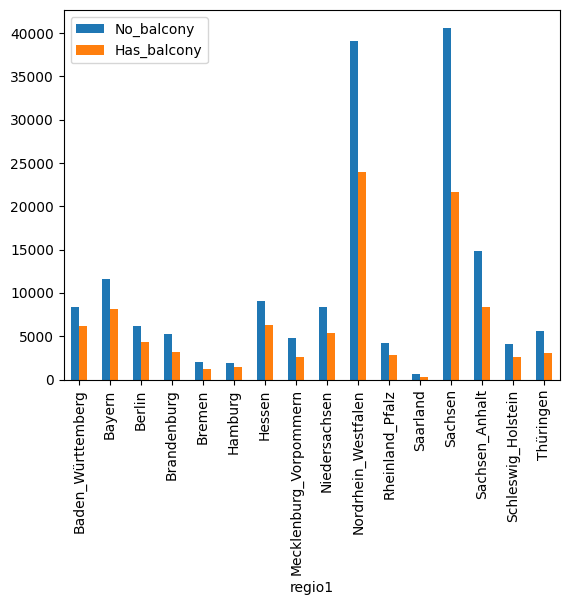

In [52]:
non_balconi = df.groupby('regio1')['balcony'].count().reset_index()
has_balconi = df.groupby('regio1')['balcony'].sum().sort_values().reset_index()
merged_balcony = pd.merge(non_balconi,has_balconi,on='regio1').set_index('regio1')
merged_balcony.rename(columns={'balcony_x':'No_balcony','balcony_y':'Has_balcony'},inplace=True)
merged_balcony.plot(kind='bar');

Let’s compare the number of gardens across different cities

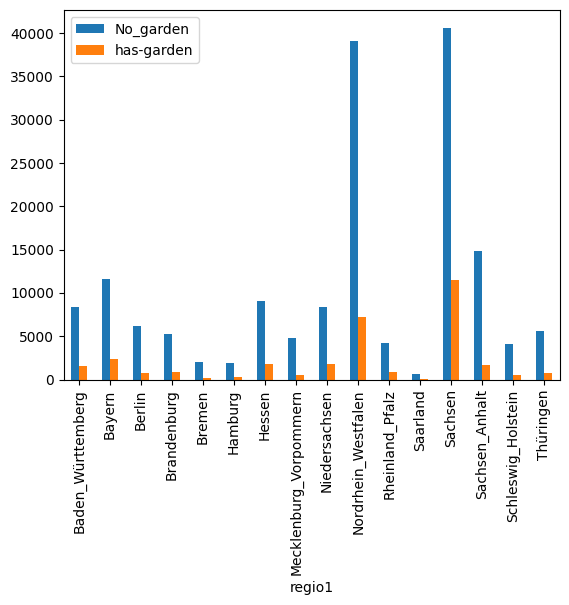

In [53]:
non_garden = df.groupby('regio1')['garden'].count().reset_index()
has_garden = df.groupby('regio1')['garden'].sum().sort_values().reset_index()
merged_garden = pd.merge(non_garden,has_garden,on='regio1').set_index('regio1')
merged_garden.rename(columns={'garden_x':'No_garden','garden_y':'has-garden'},inplace=True)
merged_garden.plot(kind='bar');

Let’s compare the living space across different cities.

In [54]:
df_ave_space = df.groupby('regio1')['livingSpace'].mean().sort_values()
pd.DataFrame(df_ave_space)

,livingSpace
regio1,
Mecklenburg_Vorpommern,60.997800
Sachsen_Anhalt,61.039278
Thüringen,62.230248
Sachsen,62.346421
Berlin,64.888583
Brandenburg,65.198199
Hamburg,67.156841
Bremen,68.164437
Bayern,69.099091


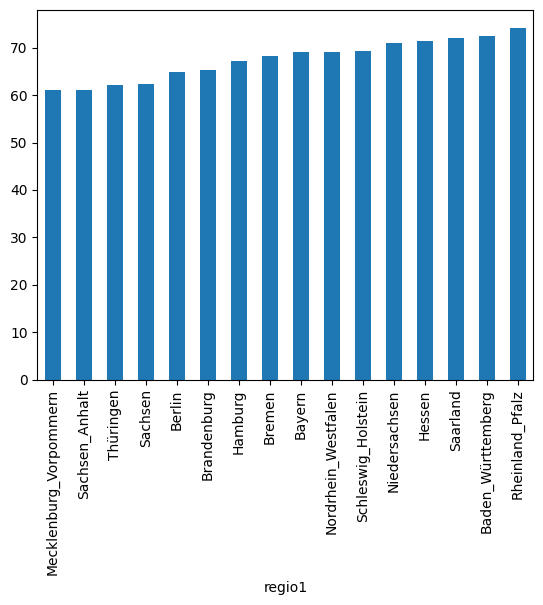

In [55]:
df.groupby('regio1')['livingSpace'].mean().sort_values().plot(kind='bar');

Lets see what kind of differnet heatingType each region use!

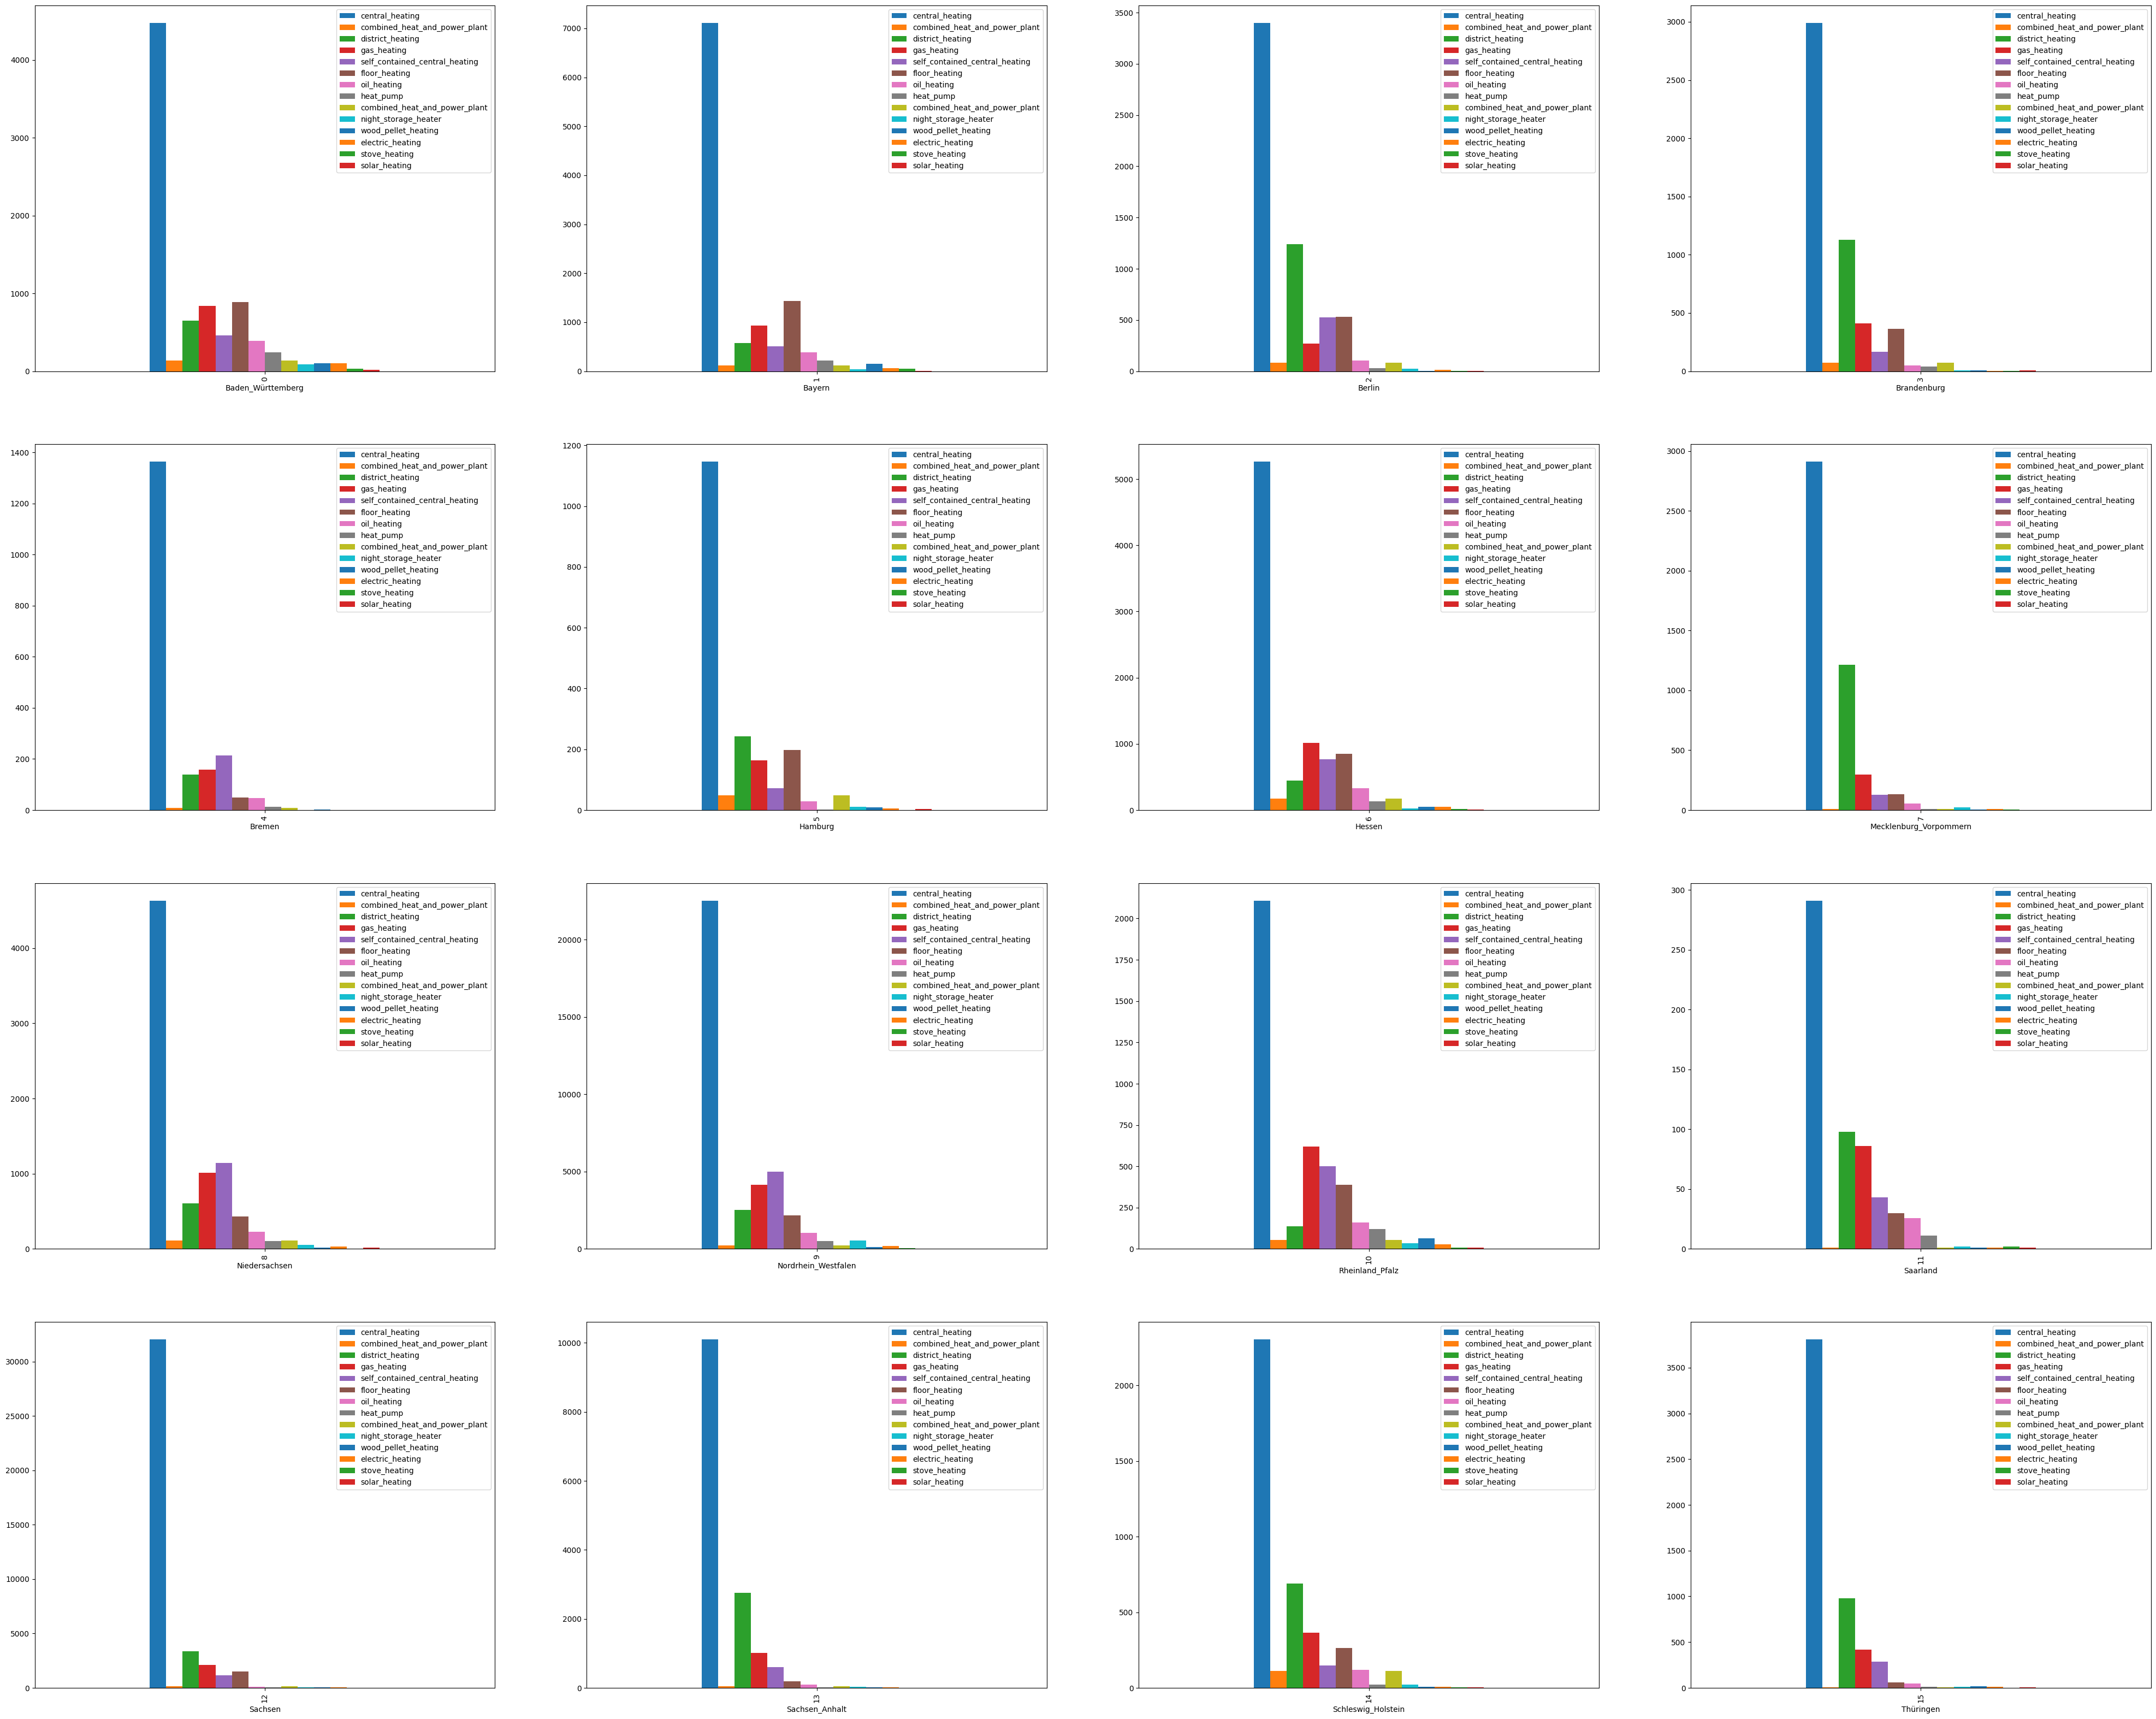

In [58]:
heatingType_region = df.groupby('regio1')[['central_heating','combined_heat_and_power_plant','district_heating','gas_heating',
                                    'self_contained_central_heating','floor_heating','oil_heating','heat_pump',
                                    'combined_heat_and_power_plant','night_storage_heater','wood_pellet_heating',
                                    'electric_heating','stove_heating','solar_heating']].sum().reset_index()
fig,ax = plt.subplots(4,4,figsize=(50,40))
heatingType_region[heatingType_region['regio1'] == 'Baden_Württemberg'].plot(ax= ax[0][0] ,kind='bar', xlabel='Baden_Württemberg')
heatingType_region[heatingType_region['regio1'] == 'Bayern'].plot(ax= ax[0][1] ,kind='bar', xlabel='Bayern')
heatingType_region[heatingType_region['regio1'] == 'Berlin'].plot(ax= ax[0][2] ,kind='bar', xlabel='Berlin')
heatingType_region[heatingType_region['regio1'] == 'Brandenburg'].plot(ax= ax[0][3] ,kind='bar', xlabel='Brandenburg')
heatingType_region[heatingType_region['regio1'] == 'Bremen'].plot(ax= ax[1][0] ,kind='bar', xlabel='Bremen')
heatingType_region[heatingType_region['regio1'] == 'Hamburg'].plot(ax= ax[1][1] ,kind='bar', xlabel='Hamburg')
heatingType_region[heatingType_region['regio1'] == 'Hessen'].plot(ax= ax[1][2] ,kind='bar', xlabel='Hessen')
heatingType_region[heatingType_region['regio1'] == 'Mecklenburg_Vorpommern'].plot(ax= ax[1][3] ,kind='bar', xlabel='Mecklenburg_Vorpommern')
heatingType_region[heatingType_region['regio1'] == 'Niedersachsen'].plot(ax= ax[2][0] ,kind='bar', xlabel='Niedersachsen')
heatingType_region[heatingType_region['regio1'] == 'Nordrhein_Westfalen'].plot(ax= ax[2][1] ,kind='bar', xlabel='Nordrhein_Westfalen')
heatingType_region[heatingType_region['regio1'] == 'Rheinland_Pfalz'].plot(ax= ax[2][2] ,kind='bar', xlabel='Rheinland_Pfalz')
heatingType_region[heatingType_region['regio1'] == 'Saarland'].plot(ax= ax[2][3] ,kind='bar', xlabel='Saarland')
heatingType_region[heatingType_region['regio1'] == 'Sachsen'].plot(ax= ax[3][0] ,kind='bar', xlabel='Sachsen')
heatingType_region[heatingType_region['regio1'] == 'Sachsen_Anhalt'].plot(ax= ax[3][1] ,kind='bar', xlabel='Sachsen_Anhalt')
heatingType_region[heatingType_region['regio1'] == 'Schleswig_Holstein'].plot(ax= ax[3][2] ,kind='bar', xlabel='Schleswig_Holstein')
heatingType_region[heatingType_region['regio1'] == 'Thüringen'].plot(ax= ax[3][3] ,kind='bar', xlabel='Thüringen');

Let’s explore which towns have the highest number of recently constructed apartments. 

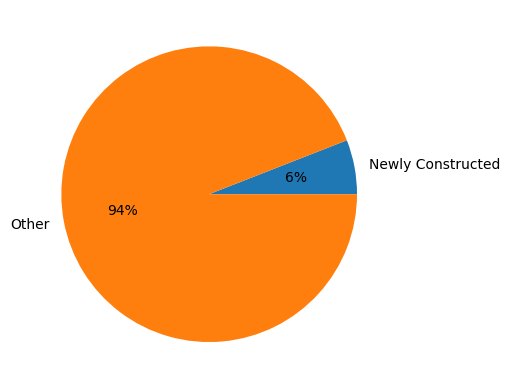

In [ ]:
new_cons = df['newlyConst'].sum()
all_cons = len(df['newlyConst'])
plt.pie([new_cons,all_cons],labels=['Newly Constructed', 'Other'],autopct='%1.0f%%');

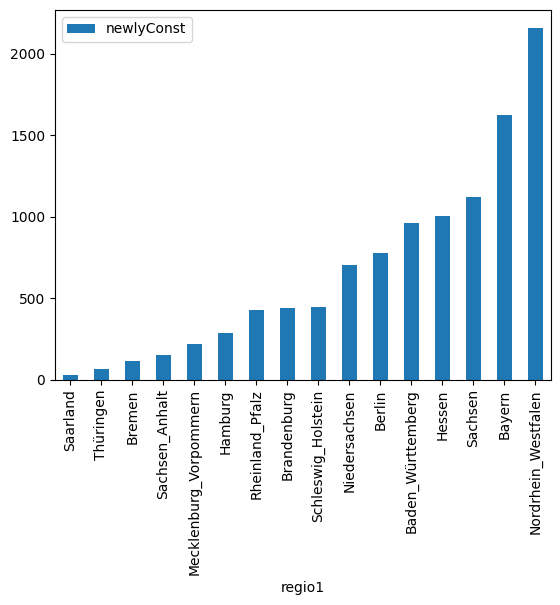

In [ ]:
newly_constructed = df.groupby('regio1')['newlyConst'].sum().sort_values().reset_index().set_index('regio1')
newly_constructed.plot(kind='bar');